#### importing necessary packages

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer

#### reading the csv

In [2]:
df = pd.read_csv("data/application_train.csv")

#### rendering the profile report

In [3]:
# profile = ProfileReport(df, title="Profiling Report", minimal=True)

In [4]:
# profile.to_file('profiling_report.html')

## Training with numerical features

#### sampling data

In [5]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(246008, 121)
(61503, 121)
(246008,)
(61503,)


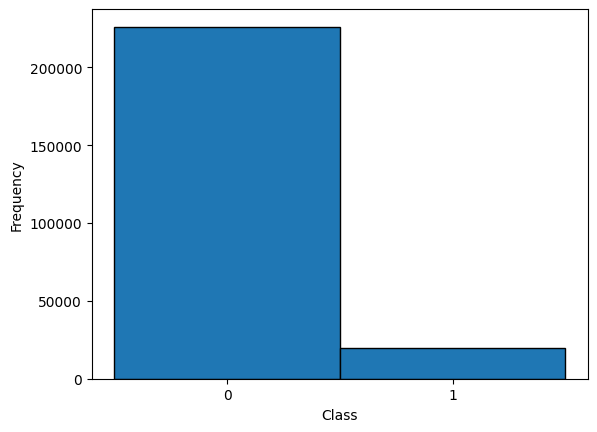

In [6]:
plt.hist(y_train, bins=[-0.5, 0.5, 1.5], edgecolor='black', align='mid')
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

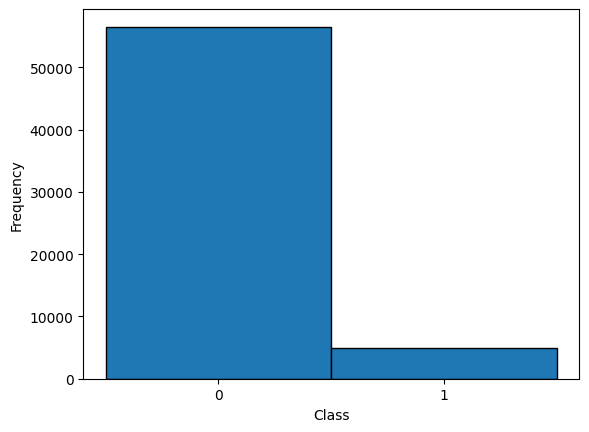

In [7]:
plt.hist(y_test, bins=[-0.5, 0.5, 1.5], edgecolor='black', align='mid')
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

#### Drop non corelated data

In [8]:
X_train['TARGET'] = y_train
df_numerical_train = X_train.select_dtypes(include=['float64', 'int64'])
df_numerical_test = X_test.select_dtypes(include=['float64', 'int64'])
corr = df_numerical_train.corr()
corr

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
SK_ID_CURR,1.000000,-0.001401,-0.002337,0.000736,0.001073,0.001140,-0.000801,-0.002655,0.001884,-0.000810,...,-0.000251,0.001874,0.001636,-0.003241,-0.004284,0.002309,0.000763,0.000773,0.005375,-0.002204
CNT_CHILDREN,-0.001401,1.000000,0.012004,0.002401,0.021200,-0.001731,-0.026412,0.330948,-0.240020,0.184339,...,-0.000106,0.002106,-0.002175,-0.000058,-0.000891,-0.002256,-0.010851,-0.010936,-0.041693,0.020347
AMT_INCOME_TOTAL,-0.002337,0.012004,1.000000,0.143809,0.174736,0.146198,0.068077,0.024687,-0.058388,0.025406,...,0.001822,0.000492,-0.000667,0.000688,0.003252,0.002222,0.022829,0.004275,0.010373,-0.002727
AMT_CREDIT,0.000736,0.002401,0.143809,1.000000,0.770163,0.987000,0.101601,-0.057428,-0.065029,0.009980,...,0.022173,0.031248,-0.016321,-0.003184,0.004864,-0.001314,0.053811,0.019123,-0.048593,-0.030803
AMT_ANNUITY,0.001073,0.021200,0.174736,0.770163,1.000000,0.775310,0.119503,0.007327,-0.102090,0.039208,...,0.005327,0.012070,-0.019289,0.003390,0.003686,0.015098,0.039085,0.011702,-0.011161,-0.012734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_WEEK,0.002309,-0.002256,0.002222,-0.001314,0.015098,-0.000845,-0.000633,-0.001557,0.002347,0.000547,...,-0.001527,-0.002108,-0.000296,0.002259,0.221462,1.000000,-0.013329,-0.019472,0.020928,0.001596
AMT_REQ_CREDIT_BUREAU_MON,0.000763,-0.010851,0.022829,0.053811,0.039085,0.056136,0.078760,0.001955,-0.034954,-0.010066,...,-0.002744,0.001096,-0.003623,0.000285,-0.004294,-0.013329,1.000000,-0.012063,-0.003586,-0.011775
AMT_REQ_CREDIT_BUREAU_QRT,0.000773,-0.010936,0.004275,0.019123,0.011702,0.019359,-0.004139,-0.017180,0.021062,-0.001535,...,-0.001268,-0.000796,-0.002271,-0.002910,-0.005235,-0.019472,-0.012063,1.000000,0.099835,-0.003404
AMT_REQ_CREDIT_BUREAU_YEAR,0.005375,-0.041693,0.010373,-0.048593,-0.011161,-0.051085,-0.001712,-0.070118,0.049851,-0.025470,...,-0.008525,-0.013124,-0.006239,-0.004211,-0.004194,0.020928,-0.003586,0.099835,1.000000,0.018984


In [9]:
corrt = abs(corr['TARGET'])
corrt.sort_values(ascending=True).head(10)

NONLIVINGAPARTMENTS_MEDI      0.000027
FLAG_DOCUMENT_5               0.000385
NONLIVINGAPARTMENTS_AVG       0.000410
FLAG_EMAIL                    0.000563
FLAG_MOBIL                    0.000597
FLAG_DOCUMENT_12              0.000597
FLAG_DOCUMENT_7               0.000779
FLAG_DOCUMENT_10              0.001195
AMT_REQ_CREDIT_BUREAU_HOUR    0.001215
FLAG_DOCUMENT_19              0.001275
Name: TARGET, dtype: float64

drop EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3

In [10]:
# X_train = df_numerical_train.drop(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'TARGET'], axis=1)
# X_test = df_numerical_test.drop(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1'], axis=1)

X_train = df_numerical_train.drop(['FLAG_DOCUMENT_5', 'NONLIVINGAPARTMENTS_AVG', 'FLAG_EMAIL', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_7', 'TARGET'], axis=1)
X_test = df_numerical_test.drop(['FLAG_DOCUMENT_5', 'NONLIVINGAPARTMENTS_AVG', 'FLAG_EMAIL', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_7'], axis=1)

#### model training with XGBoost only using numerical data

In [11]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Prepare data
X_train_selected = np.array(X_train)
X_test_selected = np.array(X_test)

stdscl = StandardScaler()
X_train_selected = stdscl.fit_transform(X_train_selected)
X_test_selected = stdscl.transform(X_test_selected)

# Train XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_selected)
print(confusion_matrix(y_test, y_pred))

[[56374   164]
 [ 4815   150]]


## Training with categorical + numerical features

#### Train/Test Split

In [12]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(246008, 121)
(61503, 121)
(246008,)
(61503,)


#### Encoding categorical features

##### function to convert Yes/Y to 1 and No/N to 0 in FLAG_OWN_CAR, FLAG_OWN_REALTY and EMERGENCYSTATE_MODE columns

In [13]:
def encode_bin(X):
    pd.set_option("future.no_silent_downcasting", True)
    
    X['FLAG_OWN_CAR'] = X['FLAG_OWN_CAR'].replace({'Y': 1, 'N': 0})
    X['FLAG_OWN_CAR'] = X['FLAG_OWN_CAR'].astype('float64')
    # print(X['FLAG_OWN_CAR'].head(3))
    
    X['FLAG_OWN_REALTY'] = X['FLAG_OWN_REALTY'].replace({'Y': 1, 'N': 0}) 
    X['FLAG_OWN_REALTY'] = X['FLAG_OWN_REALTY'].astype('float64')
    # print(X['FLAG_OWN_REALTY'].head(3))
    
    X['EMERGENCYSTATE_MODE'] = X['EMERGENCYSTATE_MODE'].replace({'Yes': 1, 'No': 0})
    X['EMERGENCYSTATE_MODE'] = X['EMERGENCYSTATE_MODE'].astype('float64')
    # print(X_train['EMERGENCYSTATE_MODE'].head(3))
    return X

In [14]:
X_train = encode_bin(X_train)
X_test = encode_bin(X_test)

##### function to raplace nulls in cat cols with 'unknown' for preventing undesired behaviour in one-hot-encoding

In [15]:
def replace_nulls(X):
    categorical = X.select_dtypes(include=['object'])
    cat_cols = categorical.columns.tolist()
    print(cat_cols)
    uniques_sum = 0
    # print('number of unique values in each column and nulls')
    for cat_col in cat_cols:
        unique_cnt = len(categorical[cat_col].unique())
        null_cnt = categorical[cat_col].isna().sum()
        
        if(null_cnt > 0):
            X[cat_col] = X[cat_col].fillna('unknown')
    
        # null_cnt_updated = X_train[cat_col].isna().sum()
        # print(f'{cat_col}:{unique_cnt}, null:{null_cnt_updated}')
        # uniques_sum += unique_cnt
    # print()
    # print(f"total unique value counts:{uniques_sum}")
    return X

In [16]:
X_train = replace_nulls(X_train)
X_test = replace_nulls(X_test)

# X_train = X_train.fillna('unknown')
# X_test = X_test.fillna('unknown')

categorical = X_train.select_dtypes(include=['object'])
cat_cols = categorical.columns.tolist()
print("After replacing nulls in categorical features with 'Unknown' null counts are as follows")
X_train[cat_cols].isna().sum()

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']
After replacing nulls in categorical features with 'Unknown' null counts are as follows


NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
FONDKAPREMONT_MODE            0
HOUSETYPE_MODE                0
WALLSMATERIAL_MODE            0
dtype: int64

*`one-hot encoding`*

In [17]:
ohe = OneHotEncoder()
encodded = ohe.fit_transform(X_train[cat_cols])

X_encd = encodded.toarray()
X_train = X_train.drop(cat_cols, axis=1)
X_train = np.array(X_train)

X_train = np.append(X_train, X_encd, axis=1)

In [18]:
X_train.shape

(246008, 247)

In [19]:
encodded = ohe.transform(X_test[cat_cols])
y_encd = encodded.toarray()
X_test = X_test.drop(cat_cols, axis=1)
X_test = np.array(X_test)

X_test = np.append(X_test, y_encd, axis=1)

In [20]:
X_test.shape

(61503, 247)

#### Checking Correlation between the features and the Target

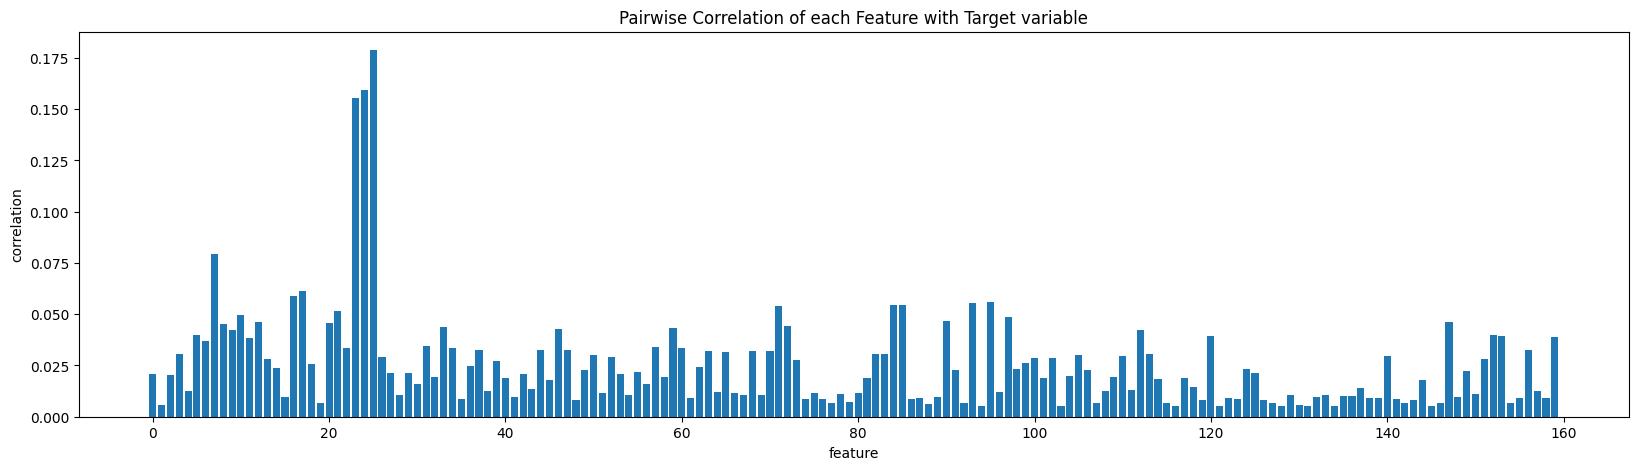

In [21]:
# concatenate x_train and y_train
combined = np.concatenate((X_train, np.array([y_train]).T), axis=1) # both have same dimensions
# convert into a pandas dataframe
x_df = pd.DataFrame(combined)
# rename lastly added one as TARGET
x_df.rename(columns={x_df.columns[247]:'TARGET'}, inplace=True)
# calculating the correlations with TARGET
corr = x_df.corrwith(x_df['TARGET'])
# take the absolute value
corrt = abs(corr)
# sorting in ascending order
corrt.sort_values(ascending=True)

corrt = corrt[corrt[corrt > 0.005].index]
corrt = corrt[:-1]

# plotting
plt.figure(figsize=(20,5))
plt.bar(np.arange(corrt.shape[0]), corrt)
plt.xlabel('feature')
plt.ylabel('correlation')
plt.title('Pairwise Correlation of each Feature with Target variable')
plt.show()

#### Drop non correlated data

In [22]:
X_train = X_train[:, corrt.index.tolist()]
X_test = X_test[:, corrt.index.tolist()]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(246008, 160)
(61503, 160)
(246008,)
(61503,)


#### Replace missing values

In [23]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

#### Oversampling

In [24]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

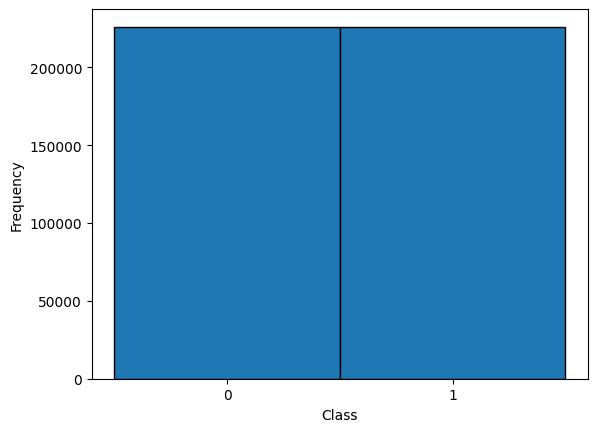

In [25]:
plt.hist(y_train, bins=[-0.5, 0.5, 1.5], edgecolor='black', align='mid')
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

#### Model training with XGBoost with one-hot-encodded features

In [26]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Prepare data
X_train_selected = np.array(X_train)
X_test_selected = np.array(X_test)

stdscl = StandardScaler()
X_train_selected = stdscl.fit_transform(X_train_selected)
X_test_selected = stdscl.transform(X_test_selected)

# Train XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_selected)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56374   164]
 [ 4813   152]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.48      0.03      0.06      4965

    accuracy                           0.92     61503
   macro avg       0.70      0.51      0.51     61503
weighted avg       0.89      0.92      0.89     61503



In [27]:
# Get feature importances
model.feature_importances_

array([0.02823845, 0.02292724, 0.00351007, 0.00052177, 0.00042693,
       0.00058333, 0.00031177, 0.00036463, 0.00052108, 0.00027736,
       0.00030049, 0.00069985, 0.0004644 , 0.00969873, 0.04391357,
       0.00091429, 0.03683322, 0.00308195, 0.00069195, 0.00036852,
       0.00448157, 0.06766233, 0.00074248, 0.00106184, 0.00370789,
       0.01121838, 0.000309  , 0.00028423, 0.00026811, 0.00023349,
       0.00024166, 0.00125833, 0.0002846 , 0.00033166, 0.00014069,
       0.00026927, 0.00026226, 0.00028819, 0.00023597, 0.0002965 ,
       0.00026508, 0.00026181, 0.00030695, 0.00030798, 0.00354261,
       0.00045967, 0.00146806, 0.00042206, 0.0002862 , 0.00029721,
       0.00030251, 0.00027491, 0.0002823 , 0.00024627, 0.00027693,
       0.00034049, 0.00023032, 0.00054654, 0.00037338, 0.00115719,
       0.0003583 , 0.00030361, 0.00033358, 0.00033604, 0.0002501 ,
       0.00026163, 0.05152556, 0.0090123 , 0.00541825, 0.00498944,
       0.00161846, 0.00033261, 0.02074511, 0.00836177, 0.00023